In [1]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def TS(alpha, K, d, t, N):
    # alpha = constant
    # K = the number of arm
    # d = the number of feature
    # t = repetation
    
    # initial
    B = np.identity(d)
    mu = np.zeros((d,1))
    f = np.zeros((d,1))
    #v=(1*((24/alpha)*d*np.log(1/0.5))**(1/2))**2
    #mu_true = np.random.rand(d,1)
    graph = pd.DataFrame(None, columns=['time','regret'])
    cnt = 0
    
    # Repeat K
    for i in range(t):
        cnt = cnt + 1
        #change the mu
        if cnt % N == 0 or cnt ==1:
            mu_true = np.random.rand(d,1)
        else:
            pass
              
        # sample from distribution
        mu_est = random.multivariate_normal(mu.reshape(1,d).tolist()[0],np.linalg.inv(B)).reshape(d,1)
        
        #select the argmax arm
        bb = np.random.rand(K,d)
        arg = np.dot(bb,mu_est)
        a_t = bb[arg.argmax(),:]
        reward = np.dot(a_t,mu_true)
        
        #update
        B = B + np.dot(a_t.reshape(d,1),a_t.reshape(1,d))
        f = f + (a_t.reshape(d,1)*reward)
        mu = np.dot(np.linalg.inv(B),f)
        
        
        # regret
        arg_r = np.dot(bb,mu_true)
        a_t_r = bb[arg_r.argmax(),:]
        reward_true = np.dot(a_t_r,mu_true)
        
        regret = reward_true-reward
        graph = graph.append({'time':i,'regret':regret[0]},ignore_index=True)
        
        
        
    # drawing the graph
    graph['accumulated_regret']=graph['regret'].cumsum()
        
    x=graph['time']
    y=graph['accumulated_regret']
        
    plt.plot(x,y)
    plt.xlabel('time')
    plt.ylabel('accumulated regret')
    plt.title('Thompson Sampling')
    plt.show()

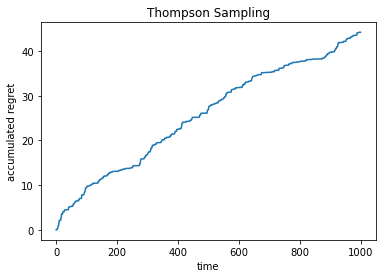

In [21]:
TS(0.5, 5, 3, 1000, 10)

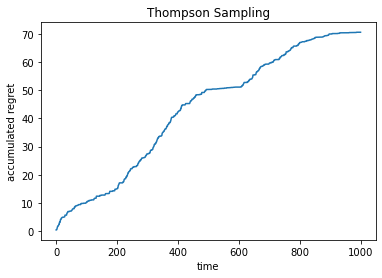

In [27]:
TS(0.5, 5, 3, 1000, 100)

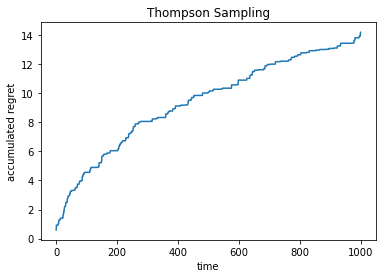

In [23]:
TS(0.5, 5, 3, 1000, 1000)